In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output
from functions import Schroedinger_Equation, leiter_operatoren

In [2]:
leiter = leiter_operatoren()

In [3]:
leiter.display()

Output()

In [ ]:
### Normierung nicht erhalten nach mehreren Aufsteiger Schritten ???

# Schritt für Schritt Berechnung

In [4]:
hbar = 1
m = 1

### Initialisierung des diskreten 1D Koordinatensystems

In [7]:
x_min = -10
x_max = 10
Nx = 2**10
dx = (x_max-x_min)/(Nx)
x_grid = np.arange(x_min,x_max,dx)

### Wellenfunktion initialisieren

Die Wellenfunktion im Ortsraum wird als das Gaußsche Wellenpaket

$\Psi(x)= \frac{1}{\sqrt{\pi x_0}} e^{-\frac{1}{2}(\frac{x}{x_0})^2}$

definiert.

In [8]:
def init_psi(x0=1):
    psi = np.zeros(Nx,dtype=complex)
    psi[:] = np.exp( -(x_grid/x0)**2 / 2 ) * np.sqrt(1/np.pi*x0)
    return psi

### Ableitung als Differenzenquotient

Die Ableitung von $\Psi(x)$ wird an jedem Gitterpunkt mithilfe des zentralen Differenzenquotienten berechnet:

$\frac{d\Psi(x)}{dx}\big|_{x=x_i} = \frac{\Psi(x_{i+1}) - \Psi(x_{i-1})}{2\Delta x}$ 

Mit Ausnahme der Randpunkte, wo am linken Rand der Vorwärts-Differenzenquotient und am rechten Rand der Rückwärts-Differenzenquotient verwendet werden.

In [9]:
def diff_psi(psi):
    d_psi = np.zeros(Nx,dtype=complex)
    d_psi[0] = (psi[1] - psi[0]) / dx
    d_psi[-1] = (psi[-1] - psi[-2]) / dx
    for i in range(1,Nx-1):
        d_psi[i] = (psi[i+1] - psi[i-1]) / (2 * dx)
    return d_psi

### Leiteroperatoren

Definition der Leiteroperatoren für den Harmonischen Oszillator

$\hat{a}\: \Psi(x) = \frac{1}{\sqrt{2}} (\frac{d}{dx} + x) \Psi(x)$

$\hat{a}^{\dagger}\: \Psi(x) = \frac{1}{\sqrt{2}} (-\frac{d}{dx} + x) \Psi(x)$

In [10]:
def apply_a(psi):
    d_psi = diff_psi(psi)
    return (d_psi + x_grid * psi) / np.sqrt(2)

In [11]:
def apply_a_dagger(psi):
    d_psi = diff_psi(psi)
    return (-d_psi + x_grid * psi) / np.sqrt(2)

### Wahrscheinlichkeitsdichte

Berechnung der Wahrscheinlichkeitsdichte im Ortsraum:

$\rho(x,t) = |\Psi(x,t)|^2$ 

In [12]:
def calc_rho(psi):
     return np.abs(psi)**2

### Plotten

In [13]:
def plot_psi(psi):
    rho = calc_rho(psi)
        
    fig, axs = plt.subplots(2)
    axs[0].plot(x_grid, np.real(psi[:]), "red", label='Re[$\psi(x,t)$]')
    axs[0].plot(x_grid, np.imag(psi[:]), "green", label='Im[$\psi(x,t)$]')

    axs[1].plot(x_grid, rho[:], "black", label='$|\psi(x,t)|^2$')
    
    axs[0].legend(loc='upper right')
    axs[1].legend(loc='upper right')
    fig.set_size_inches(10, 9)
    
    axs[0].set_xlim([x_min, x_max])
    axs[1].set_xlim([x_min, x_max])

    plt.rcParams['font.size'] = '20'
    plt.show()

In [14]:
class psi_tracker_class:
    def __init__(self):
        self.psi = init_psi()
    
    def a_click(self):
        self.psi = apply_a(self.psi)
    
    def a_dagger_click(self):
        self.psi = apply_a_dagger(self.psi)
            
    def reset_click(self):
        self.psi = init_psi()
        
    def plot(self):
        plot_psi(self.psi)

In [15]:
psi_tracker = psi_tracker_class()

a_button = widgets.Button(description='Absteiger')
a_dagger_button = widgets.Button(description='Aufsteiger')
reset_button = widgets.Button(description='Reset')

def a_button_function(click_input):
    with out:
        clear_output()
        psi_tracker.a_click()
        psi_tracker.plot()
                
a_button.on_click(a_button_function)

def a_dagger_button_function(click_input):
    with out:
        clear_output()
        psi_tracker.a_dagger_click()
        psi_tracker.plot()
                
a_dagger_button.on_click(a_dagger_button_function)
        
def reset_button_function(click_input):
    with out:
        clear_output()
        psi_tracker.reset_click()
        psi_tracker.plot()
        
reset_button.on_click(reset_button_function)

out = widgets.Output()
reset_button_function('')

display(widgets.HBox([a_button,a_dagger_button,reset_button] ),out)

Output()

In [ ]:
initial_psi = init_psi()

fig, axs = plt.subplots()
fig.subplots_adjust(bottom=0.2)

line_real, = axs.plot(x_grid, np.real(initial_psi[:]), "red", label='Re[$\psi(x,t)$]')

class psi_tracker_class:
    def __init__(self):
        self.psi = init_psi()
        self.rho = np.abs(self.psi)**2
        
    def calc_rho(self):
        self.rho = np.abs(self.psi)**2
    
    def a_click(self,event):
        self.psi = apply_a(self.psi)
        self.calc_rho()
        
        line_real.set_ydata(np.real(self.psi))
        plt.draw()
    
    def a_dagger_click(self,event):
        self.psi = apply_a_dagger(self.psi)
        self.calc_rho()
        
        line_real.set_ydata(np.real(self.psi))
        plt.autoscale
        plt.draw()
        
    def reset_click(self,event):
        self.psi = init_psi()
        self.calc_rho()
        
        line_real.set_ydata(np.real(self.psi))
        plt.draw()

psi_tracker = psi_tracker_class()


axs.legend(loc='upper right')

    
axs.set_xlim([x_min, x_max])

plt.rcParams['font.size'] = '20'

ax_a = fig.add_axes([0.6, 0, 0.2, 0.075])
a_button = Button(ax_a,'Absteiger')
a_button.on_clicked(psi_tracker.a_click)

ax_a_dagger = fig.add_axes([0.81, 0, 0.2, 0.075])
a_dagger_button = Button(ax_a_dagger,'Aufsteiger')
a_dagger_button.on_clicked(psi_tracker.a_dagger_click)


plt.show()

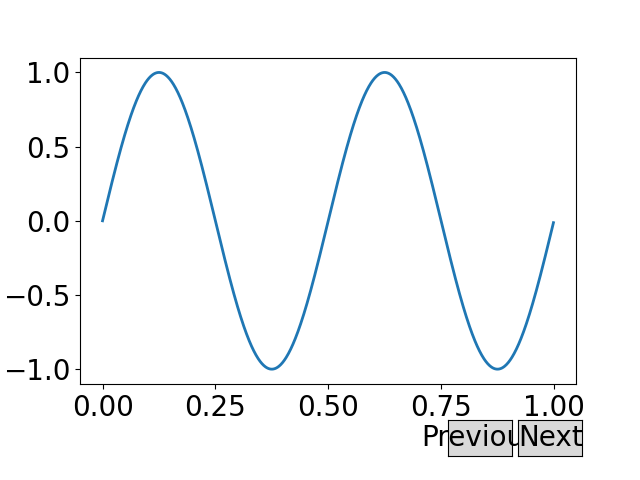

In [27]:
freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = ax.plot(t, s, lw=2)


class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.075])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()